# Import Library dan Persiapan Dataset

In [1]:
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
!dir

 Volume in drive C is Local Disk
 Volume Serial Number is AA52-D03B

 Directory of C:\Users\edyar\Downloads\Produksi Padi

03/01/2024  22:47    <DIR>          .
03/01/2024  22:09    <DIR>          ..
30/12/2023  00:15    <DIR>          .ipynb_checkpoints
25/12/2023  12:55               988 data_padi.csv
25/12/2023  12:54             9.431 data_padi.xlsx
25/12/2023  13:33           129.637 PR_timeseries_padi.ipynb
03/01/2024  22:47           501.978 timeserie_produksi_padi.ipynb
30/12/2023  00:29           126.830 Untitled.ipynb
               5 File(s)        768.864 bytes
               3 Dir(s)  159.384.829.952 bytes free


In [2]:
#drive.mount('/content/gdrive')
#file_path = "gdrive/My Drive/Colab Notebooks/data_padi.csv"
file_path = "C:/Users/edyar/Downloads/Produksi Padi/data_padi.csv"
data_padi = pd.read_csv(file_path)

# Exploratory Data Analysis (EDA)

In [3]:
data_padi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Tahun     53 non-null     int64  
 1   Produksi  53 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 976.0 bytes


In [4]:
data_padi.head()

,Tahun,Produksi
0,1970,18693649.0
1,1971,20483687.0
2,1972,19393933.0
3,1973,21490578.0
4,1974,22476073.0


In [5]:
data_padi.tail()

,Tahun,Produksi
48,2018,59101577.84
49,2019,54604033.34
50,2020,54649202.24
51,2021,53802637.44
52,2022,54338410.44


In [6]:
data_padi.shape

(53, 2)

In [7]:
missing_values = data_padi.isnull().sum()
missing_values

Tahun       0
Produksi    0
dtype: int64

In [8]:
# Statistik Deskriptif Dasar
data_padi.describe()

,Tahun,Produksi
count,53.000000,5.300000e+01
mean,1996.000000,4.694139e+07
std,15.443445,1.632983e+07
min,1970.000000,1.869365e+07
25%,1983.000000,3.530311e+07
50%,1996.000000,4.937705e+07
75%,2009.000000,5.460403e+07
max,2022.000000,8.114862e+07


Statistik deskriptif dari dataset adalah sebagai berikut:

Jumlah Tahun (Count): 53 tahun (1970 - 2022)<br>
Rata-rata Produksi (Mean): Sekitar 46.94 juta ton<br>
Standar Deviasi Produksi (Std): Sekitar 16.33 juta<br>
Minimum Produksi: 18.69 juta<br>
Maksimum Produksi: 81.15 juta<br>
Median Produksi (50%): 49.38 juta, yang berarti setengah dari tahun mencatat produksi di bawah ini dan setengah di atasnya<br>

# Visualisasi Tren Produksi Padi

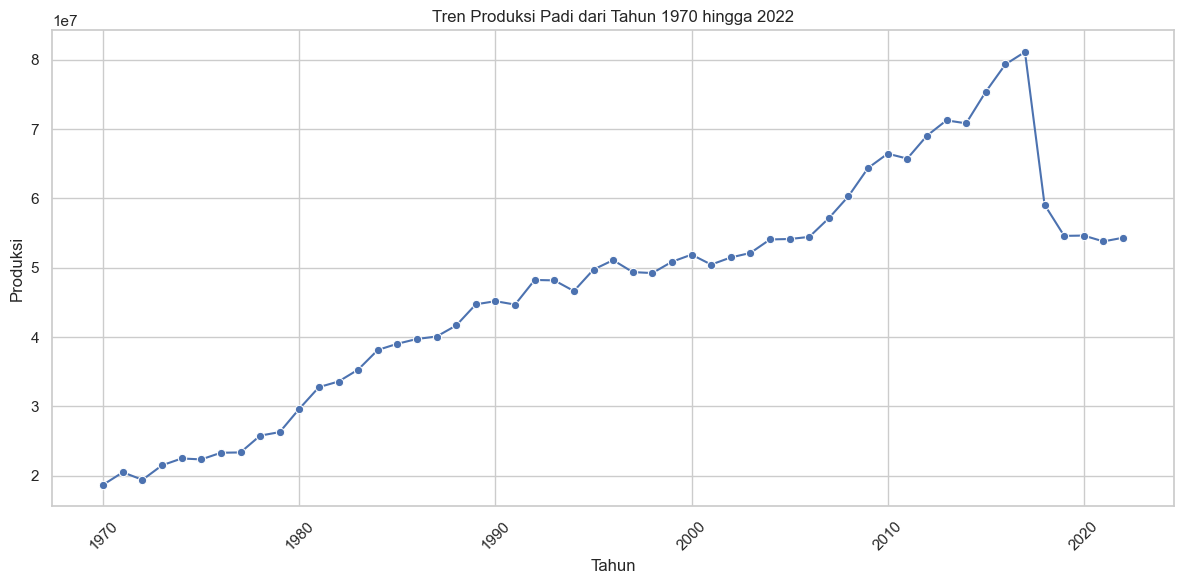

In [9]:
# Mengatur style
sns.set(style="whitegrid")

# Plotting tren produksi
plt.figure(figsize=(12, 6))
sns.lineplot(x='Tahun', y='Produksi', data=data_padi, marker='o')
plt.title('Tren Produksi Padi dari Tahun 1970 hingga 2022')
plt.xlabel('Tahun')
plt.ylabel('Produksi')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Grafik di atas menunjukkan tren produksi padi dari tahun 1970 hingga 2022. Dari grafik, kita dapat melihat beberapa hal:
1. Tren Umum: Secara umum, ada tren peningkatan produksi padi dari tahun ke tahun.
2. Fluktuasi: Meskipun ada tren kenaikan, terdapat beberapa fluktuasi tahunan dalam produksi.
3. Lonjakan Produksi: Terlihat beberapa lonjakan produksi yang signifikan di beberapa titik, menunjukkan tahun-tahun dengan produksi yang jauh lebih tinggi daripada rata-rata.

### Analisis distribusi data untuk melihat apakah data mendekati distribusi normal.

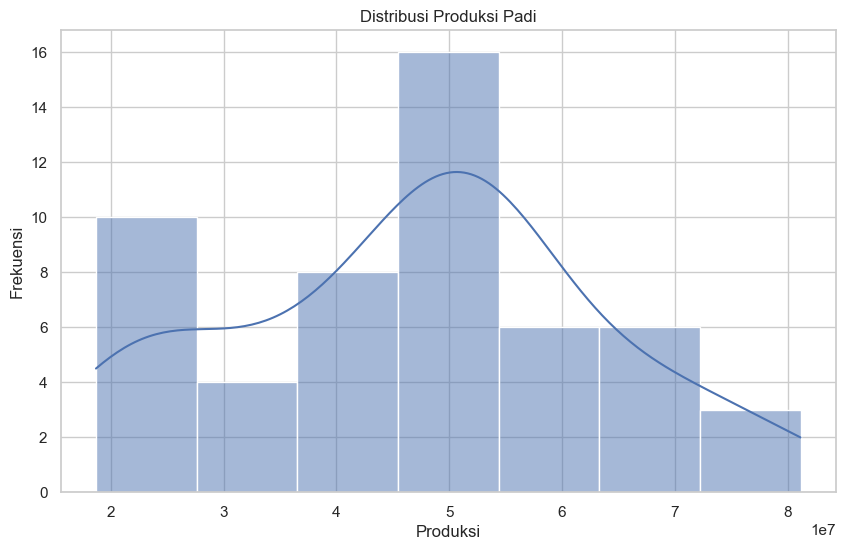

In [10]:
# Plotting distribusi produksi
plt.figure(figsize=(10, 6))
sns.histplot(data_padi['Produksi'], kde=True)
plt.title('Distribusi Produksi Padi')
plt.xlabel('Produksi')
plt.ylabel('Frekuensi')
plt.show()

Dari grafik distribusi produksi padi, kita dapat melihat distribusi tidak sepenuhnya simetris dan tampaknya tidak mengikuti distribusi normal (Gaussian) yang sempurna.
Ada kemiringan (skewness) ke kanan, yang menunjukkan keberadaan nilai-nilai yang lebih tinggi dari rata-rata.

Langkah-langkah:
1. Normalisasi data agar nilai produksi berada dalam rentang 0 hingga 1.
2. Menerapkan model sederhana:
- Model Rata-rata Sederhana: Menggunakan rata-rata historis dari data yang dinormalisasi untuk semua prediksi.
- Model Moving Average (MA): Menggunakan rata-rata bergerak dari periode terakhir untuk prediksi. Kita akan menggunakan jendela waktu 5 tahun.
- Model Exponential Smoothing (ES): Kita akan menggunakan Simple Exponential Smoothing tanpa komponen tren atau musiman.
3. Visualisasi grafik hasil prediksi
4. Evaluasi metrik
5. Kesimpulan

## Normalisasi Dataset

In [11]:
from sklearn.preprocessing import MinMaxScaler

# Normalisasi data produksi
scaler = MinMaxScaler()
data_padi['Produksi_Normalized'] = scaler.fit_transform(data_padi[['Produksi']])

# Memeriksa beberapa baris data setelah normalisasi
data_padi.head()

,Tahun,Produksi,Produksi_Normalized
0,1970,18693649.0,0.000000
1,1971,20483687.0,0.028661
2,1972,19393933.0,0.011213
3,1973,21490578.0,0.044783
4,1974,22476073.0,0.060562


## Prediksi Dengan Model Sederhana

In [12]:
from statsmodels.tsa.api import SimpleExpSmoothing

# Menyiapkan data
years = data_padi['Tahun']
produksi_normalized = data_padi['Produksi_Normalized']

# 1. Simple Mean Model
mean_production = np.mean(produksi_normalized)
predictions_mean = np.full(shape=len(produksi_normalized), fill_value=mean_production)

# 2. Moving Average Model
window_size = 5
predictions_ma = produksi_normalized.rolling(window=window_size).mean()
predictions_ma = predictions_ma.fillna(mean_production)  # Mengganti nilai NaN dengan nilai mean

# 3. Exponential Smoothing Model
model_es = SimpleExpSmoothing(produksi_normalized).fit(smoothing_level=0.2, optimized=False)
predictions_es = model_es.fittedvalues

# Membuat DataFrame untuk prediksi
predictions_df = pd.DataFrame({
    'Tahun': years,
    'Produksi_Normalized': produksi_normalized,
    'Mean_Model': predictions_mean,
    'Moving_Average': predictions_ma,
    'Exponential_Smoothing': predictions_es
})

predictions_df.head()

,Tahun,Produksi_Normalized,Mean_Model,Moving_Average,Exponential_Smoothing
0,1970,0.000000,0.45229,0.452290,0.000000
1,1971,0.028661,0.45229,0.452290,0.000000
2,1972,0.011213,0.45229,0.452290,0.005732
3,1973,0.044783,0.45229,0.452290,0.006828
4,1974,0.060562,0.45229,0.029044,0.014419


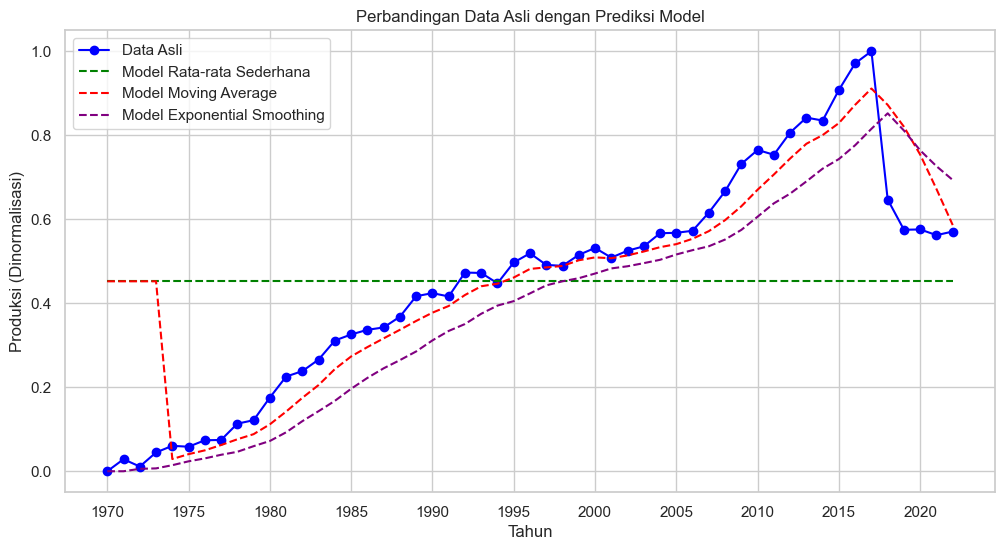

In [13]:
# Plotting prediksi bersama dengan produksi aktual yang dinormalisasi
plt.figure(figsize=(12, 6))

# Data asli
plt.plot(predictions_df['Tahun'], predictions_df['Produksi_Normalized'], label='Data Asli', color='blue', marker='o')

# Mean Model
plt.plot(predictions_df['Tahun'], predictions_df['Mean_Model'], label='Model Rata-rata Sederhana', color='green', linestyle='--')

# Moving Average
plt.plot(predictions_df['Tahun'], predictions_df['Moving_Average'], label='Model Moving Average', color='red', linestyle='--')

# Exponential Smoothing
plt.plot(predictions_df['Tahun'], predictions_df['Exponential_Smoothing'], label='Model Exponential Smoothing', color='purple', linestyle='--')

plt.title('Perbandingan Data Asli dengan Prediksi Model')
plt.xlabel('Tahun')
plt.ylabel('Produksi (Dinormalisasi)')
plt.legend()
plt.xticks(years[::5])
plt.grid(True)
plt.show()

Grafik di atas menampilkan data produksi padi yang dinormalisasi (biru) bersama dengan prediksi yang dihasilkan oleh tiga model yang berbeda:

1. Model Rata-rata Sederhana (hijau): Prediksi ini merupakan garis datar karena selalu menggunakan rata-rata historis dari seluruh dataset.
2. Model Moving Average (merah): Garis ini lebih mengikuti tren dalam data, terutama setelah beberapa tahun pertama. Ini karena model menggunakan rata-rata bergerak dari 5 tahun terakhir.
3. Model Exponential Smoothing (ungu): Model ini menyesuaikan diri lebih dekat dengan data asli dibandingkan dua model lainnya, menunjukkan perubahan tren seiring waktu.

Analisis:

- Model Rata-rata Sederhana terlalu sederhana dan tidak mampu menangkap perubahan tren atau fluktuasi tahunan dalam produksi.
- Model Moving Average memberikan perkiraan yang lebih baik daripada model rata-rata sederhana, tetapi masih kaku dan lambat dalam merespons perubahan tren.
- Model Exponential Smoothing memberikan hasil yang lebih baik dalam menyesuaikan diri dengan perubahan tren dalam data, meskipun mungkin masih terlalu sederhana untuk menangkap semua aspek dinamis dari data time series.

Untuk mengevaluasi model-model prediksi yang telah kita gunakan, kita akan menggunakan beberapa metrik evaluasi yang umum untuk data time series. Metrik yang paling sering digunakan adalah:
- Mean Absolute Error (MAE): Rata-rata dari nilai absolut kesalahan (perbedaan antara prediksi dan nilai sebenarnya).
- Mean Squared Error (MSE): Rata-rata dari kuadrat kesalahan.
- Root Mean Squared Error (RMSE): Akar kuadrat dari MSE, berguna karena memiliki unit yang sama dengan data asli.

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Fungsi untuk menghitung RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Data asli
y_true = predictions_df['Produksi_Normalized']

# Evaluasi Mean Model
mae_mean_model = mean_absolute_error(y_true, predictions_df['Mean_Model'])
mse_mean_model = mean_squared_error(y_true, predictions_df['Mean_Model'])
rmse_mean_model = rmse(y_true, predictions_df['Mean_Model'])

# Evaluasi Moving Average Model
mae_ma_model = mean_absolute_error(y_true, predictions_df['Moving_Average'])
mse_ma_model = mean_squared_error(y_true, predictions_df['Moving_Average'])
rmse_ma_model = rmse(y_true, predictions_df['Moving_Average'])

# Evaluasi Exponential Smoothing Model
mae_es_model = mean_absolute_error(y_true, predictions_df['Exponential_Smoothing'])
mse_es_model = mean_squared_error(y_true, predictions_df['Exponential_Smoothing'])
rmse_es_model = rmse(y_true, predictions_df['Exponential_Smoothing'])

# Perbandingan hasil ke DataFrame
evaluation_results = pd.DataFrame({
    'Model': ['Mean Model', 'Moving Average', 'Exponential Smoothing'],
    'MAE': [mae_mean_model, mae_ma_model, mae_es_model],
    'MSE': [mse_mean_model, mse_ma_model, mse_es_model],
    'RMSE': [rmse_mean_model, rmse_ma_model, rmse_es_model]
})

evaluation_results


,Model,MAE,MSE,RMSE
0,Mean Model,0.208376,0.067074,0.258987
1,Moving Average,0.082212,0.019058,0.138052
2,Exponential Smoothing,0.097693,0.012539,0.111976


Kesimpulan:
- Model Rata-rata Sederhana memiliki nilai MAE, MSE, dan RMSE yang paling tinggi di antara ketiga model. Ini menunjukkan bahwa model ini adalah yang paling tidak akurat dalam memprediksi data produksi padi.
- Model Moving Average menunjukkan peningkatan yang signifikan dibandingkan dengan model rata-rata sederhana, dengan nilai MAE, MSE, dan RMSE yang lebih rendah.
- Model Exponential Smoothing memiliki nilai RMSE terendah, menunjukkan bahwa model ini adalah yang paling akurat dalam memprediksi data produksi padi di antara ketiga model yang diuji.
- Model Exponential Smoothing tampaknya memberikan keseimbangan terbaik antara responsivitas terhadap perubahan data dan menghaluskan fluktuasi, sehingga menghasilkan prediksi yang paling akurat untuk dataset ini.
- Dalam konteks data time series seperti produksi padi, model yang lebih kompleks mungkin diperlukan untuk menangkap pola musiman atau tren jangka panjang dengan lebih akurat. Model seperti Regresi, ARIMA, SARIMA, atau bahkan model pembelajaran mesin yang lebih canggih mungkin memberikan hasil yang lebih baik.

## Prediksi Dengan Model Regresi Linier dan Regresi Polynomial

Untuk melanjutkan, kita akan menerapkan dan mengevaluasi dua model berikut pada dataset produksi padi yang telah dinormalisasi:
1. Model Regresi Linier: Model ini akan mencoba memprediksi produksi padi berdasarkan tahun sebagai variabel independen.
2. Model Regresi Polynomial: Model ini juga akan menggunakan tahun sebagai variabel independen, tetapi dengan menambahkan polinomial untuk menangkap hubungan non-linier.

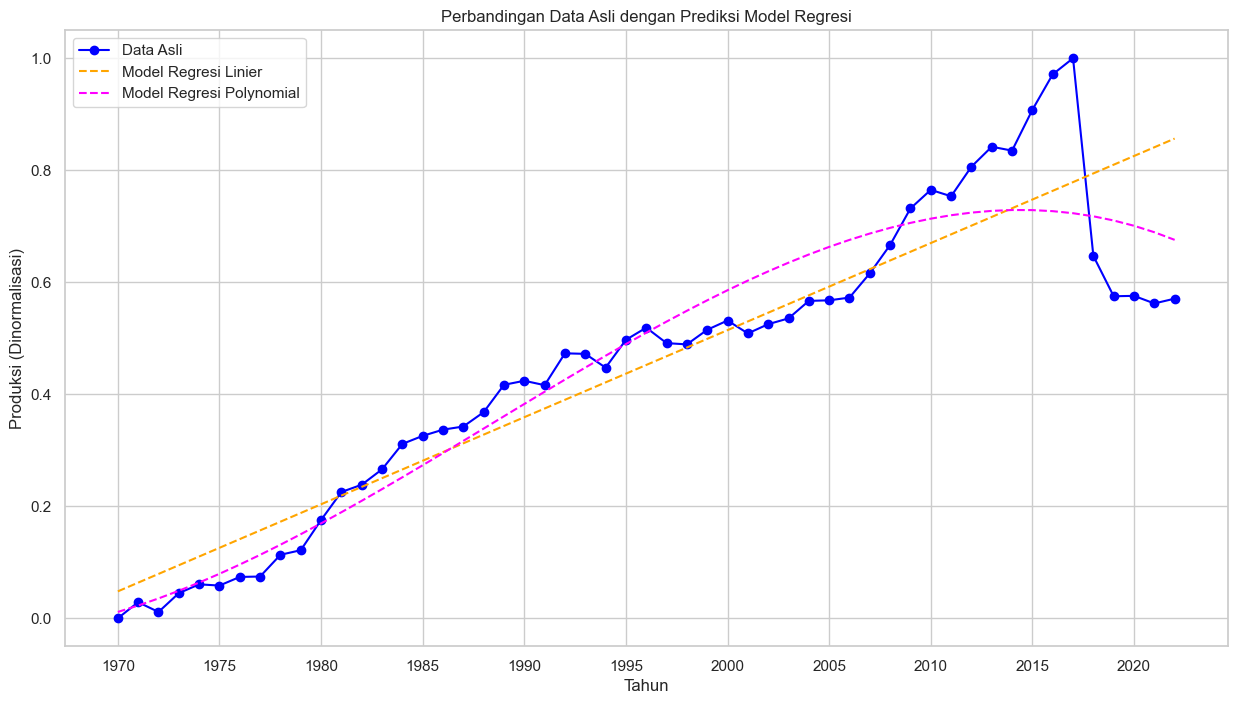

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Menyiapkan data untuk model regresi
X = data_padi['Tahun'].values.reshape(-1, 1)
y = data_padi['Produksi_Normalized']

# 7. Linear Regression Model
linear_model = LinearRegression().fit(X, y)
predictions_linear = linear_model.predict(X)

# 8. Polynomial Regression Model
degree = 3  # Derajat polynomial
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_model.fit(X, y)
predictions_poly = poly_model.predict(X)

# Menambahkan prediksi ke DataFrame
predictions_df['Linear_Regression'] = predictions_linear
predictions_df['Polynomial_Regression'] = predictions_poly

# Plotting prediksi bersama dengan produksi aktual yang dinormalisasi
plt.figure(figsize=(15, 8))

# Data asli
plt.plot(predictions_df['Tahun'], predictions_df['Produksi_Normalized'], label='Data Asli', color='blue', marker='o')

# Linear Regression
plt.plot(predictions_df['Tahun'], predictions_df['Linear_Regression'], label='Model Regresi Linier', color='orange', linestyle='--')

# Polynomial Regression
plt.plot(predictions_df['Tahun'], predictions_df['Polynomial_Regression'], label='Model Regresi Polynomial', color='magenta', linestyle='--')

plt.title('Perbandingan Data Asli dengan Prediksi Model Regresi')
plt.xlabel('Tahun')
plt.ylabel('Produksi (Dinormalisasi)')
plt.legend()
plt.xticks(years[::5])
plt.grid(True)
plt.show()

Grafik di atas menampilkan hasil prediksi dari Model Regresi Linier (warna oranye) dan Model Regresi Polynomial (warna magenta), dibandingkan dengan data produksi padi yang dinormalisasi (warna biru).
Selanjutnya, kita hitung metrik evaluasi untuk kedua model ini dan kemudian menganalisis kinerjanya.

In [16]:
# Evaluasi Linear Regression Model
mae_linear = mean_absolute_error(y_true, predictions_df['Linear_Regression'])
mse_linear = mean_squared_error(y_true, predictions_df['Linear_Regression'])
rmse_linear = rmse(y_true, predictions_df['Linear_Regression'])

# Evaluasi Polynomial Regression Model
mae_poly = mean_absolute_error(y_true, predictions_df['Polynomial_Regression'])
mse_poly = mean_squared_error(y_true, predictions_df['Polynomial_Regression'])
rmse_poly = rmse(y_true, predictions_df['Polynomial_Regression'])

# Menambahkan hasil evaluasi ke DataFrame
new_evaluation_results = pd.DataFrame({
    'Model': ['Linear Regression', 'Polynomial Regression'],
    'MAE': [mae_linear, mae_poly],
    'MSE': [mse_linear, mse_poly],
    'RMSE': [rmse_linear, rmse_poly]
})

# Menggabungkan dengan hasil sebelumnya
evaluation_results = pd.concat([evaluation_results, new_evaluation_results]).reset_index(drop=True)
evaluation_results


,Model,MAE,MSE,RMSE
0,Mean Model,0.208376,0.067074,0.258987
1,Moving Average,0.082212,0.019058,0.138052
2,Exponential Smoothing,0.097693,0.012539,0.111976
3,Linear Regression,0.074061,0.010503,0.102483
4,Polynomial Regression,0.061589,0.006921,0.083194


Analisis:
- Model Regresi Linier menunjukkan peningkatan dalam akurasi dibandingkan dengan model sebelumnya seperti Mean Model, Moving Average, dan Exponential Smoothing. Ini menunjukkan bahwa ada hubungan linear antara tahun dan produksi padi yang dinormalisasi.
- Model Regresi Polynomial memiliki nilai MAE, MSE, dan RMSE yang lebih rendah dari semua model sebelumnya, termasuk regresi linier. Hal ini menunjukkan bahwa model ini lebih efektif dalam menangkap hubungan non-linier dalam data. Kemampuan untuk menyesuaikan bentuk polinomial dengan tren data menghasilkan prediksi yang lebih akurat.
- Grafik menunjukkan bahwa Model Regresi Polynomial mampu menyesuaikan diri dengan baik dengan fluktuasi dalam data, berbeda dengan Model Regresi Linier yang cenderung mengikuti tren linear secara keseluruhan.

Dari hasil ini, kita dapat menyimpulkan bahwa Model Regresi Polynomial lebih cocok untuk dataset ini dibandingkan dengan model-model yang telah diuji sebelumnya, karena kemampuannya dalam menangkap hubungan non-linier dan fluktuasi dalam data produksi padi.

## Prediksi Dengan Model ARIMA dan SARIMA 

Selanjutnya, kita akan menerapkan dan mengevaluasi Model ARIMA (Autoregressive Integrated Moving Average) dan Model SARIMA (Seasonal ARIMA) pada dataset produksi padi yang telah dinormalisasi. Kedua model ini dirancang khusus untuk data time series dan mampu menangkap hubungan autoregressive serta komponen musiman dalam data.

Penerapan model-model ini memerlukan langkah-langkah seperti pemilihan parameter yang tepat (misalnya, ordo ARIMA dan parameter musiman untuk SARIMA). Kita akan melakukan hal berikut:
1. Memilih Parameter ARIMA dan SARIMA: Melalui proses seperti grid search atau melihat ACF (Autocorrelation Function) dan PACF (Partial Autocorrelation Function).
2. Melatih Model ARIMA dan SARIMA: Dengan parameter yang dipilih.
3. Membuat Prediksi: Menggunakan model yang terlatih.
4. Visualisasi Hasil: Membandingkan prediksi dengan data asli.
5. Evaluasi Metrik: Menggunakan MAE, MSE, dan RMSE.
6. Analisis Hasil: Melihat kinerja dan kecocokan model.

Mari kita mulai dengan menentukan dan melatih model ARIMA dan SARIMA. Karena proses ini bisa menjadi cukup kompleks dan memerlukan pemilihan parameter yang tepat, kita akan memulainya dengan analisis ACF dan PACF untuk memandu pemilihan parameter.

C:\Users\edyar\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


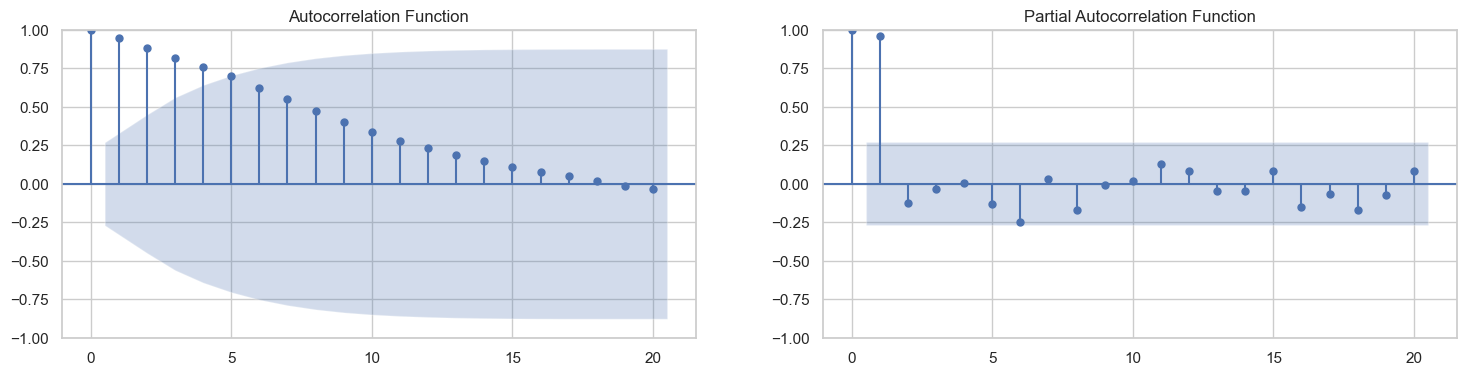

In [22]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Function to plot ACF and PACF
def plot_acf_pacf(series, lags=20):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 4))

    # Plot ACF
    plot_acf(series, lags=lags, ax=ax1)
    ax1.set_title('Autocorrelation Function')

    # Plot PACF
    plot_pacf(series, lags=lags, ax=ax2)
    ax2.set_title('Partial Autocorrelation Function')

    plt.show()

# Plot ACF and PACF for the normalized production data
plot_acf_pacf(produksi_normalized)

Grafik ACF (Autocorrelation Function) dan PACF (Partial Autocorrelation Function) di atas memberikan wawasan tentang pemilihan parameter untuk model ARIMA dan SARIMA. Berikut beberapa observasi dari grafik:
- Grafik ACF: Menunjukkan korelasi yang melambat secara bertahap, suatu indikasi bahwa data mungkin memiliki komponen AR (Autoregressive).
- Grafik PACF: Menunjukkan beberapa puncak awal, yang bisa membantu menentukan ordo komponen MA (Moving Average).

Berdasarkan grafik ini, kita dapat memulai dengan pemilihan parameter awal untuk ARIMA. Namun, mengingat sifat musiman dari data produksi padi, model SARIMA mungkin lebih cocok. SARIMA memerlukan parameter tambahan untuk komponen musiman (SAR dan SMA).

Untuk memulai, kita akan menggunakan pendekatan trial and error untuk memilih parameter, menyesuaikannya berdasarkan kinerja model. Mari kita mulai dengan pelatihan dan prediksi menggunakan model ARIMA dan SARIMA, dan kemudian melanjutkan dengan visualisasi dan evaluasi hasilnya.

C:\Users\edyar\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


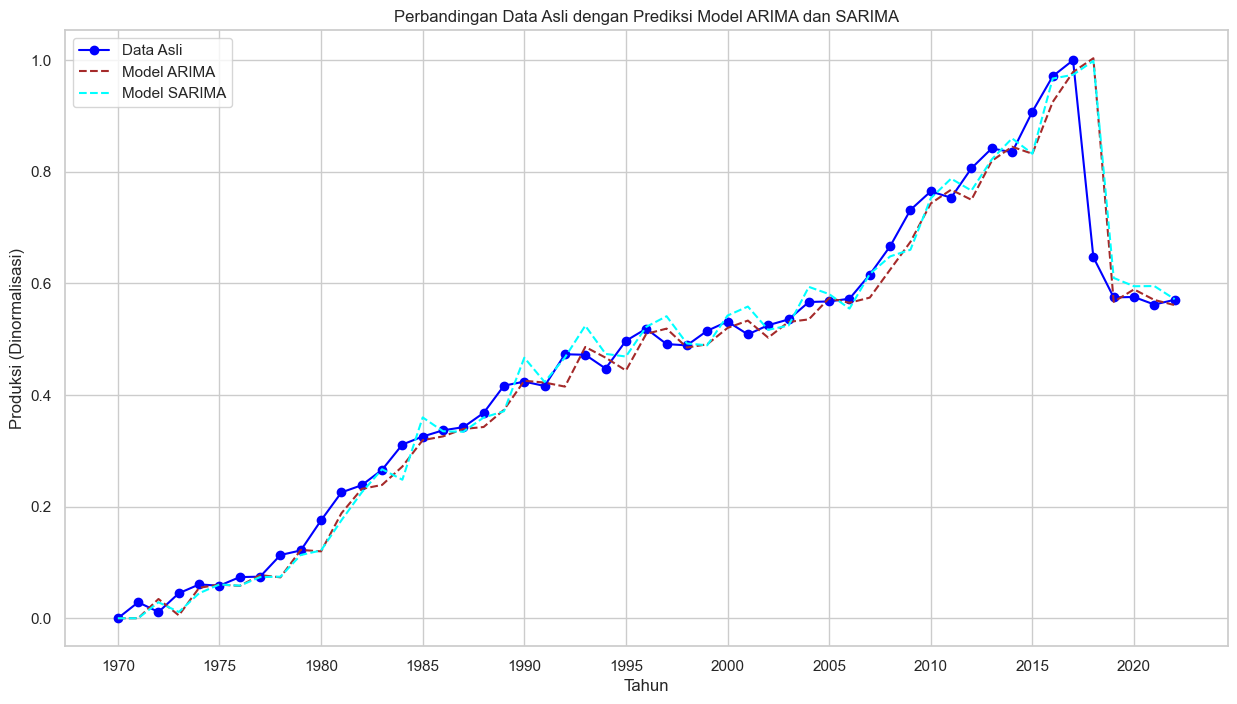

In [18]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Menentukan parameter awal untuk model ARIMA dan SARIMA
# Catatan: Parameter ini dipilih berdasarkan plot ACF dan PACF, dan beberapa trial dan error
# ARIMA(p,d,q) di mana p = AR order, d = differencing, q = MA order
arima_order = (1, 1, 1)  # These are example parameters

# SARIMA(p,d,q)(P,D,Q,s) di mana P = seasonal AR order, D = seasonal differencing, Q = seasonal MA order, s = seasonality
sarima_order = (1, 1, 1, 1, 1, 1, 12)  # Parameter ini dapat diubah untuk mencari nilai yang optimal

# Training ARIMA Model
model_arima = SARIMAX(produksi_normalized, order=(arima_order[0], arima_order[1], arima_order[2]), seasonal_order=(0,0,0,0)).fit()

# Training SARIMA Model
model_sarima = SARIMAX(produksi_normalized, order=(sarima_order[0], sarima_order[1], sarima_order[2]), seasonal_order=(sarima_order[3], sarima_order[4], sarima_order[5], sarima_order[6])).fit()

# Prediksi
predictions_arima = model_arima.fittedvalues
predictions_sarima = model_sarima.fittedvalues

# Menambahkan prediksi ke DataFrame
predictions_df['ARIMA'] = predictions_arima
predictions_df['SARIMA'] = predictions_sarima

# Plotting prediksi bersama dengan produksi aktual yang dinormalisasi
plt.figure(figsize=(15, 8))

# Data asli
plt.plot(predictions_df['Tahun'], predictions_df['Produksi_Normalized'], label='Data Asli', color='blue', marker='o')

# ARIMA
plt.plot(predictions_df['Tahun'], predictions_df['ARIMA'], label='Model ARIMA', color='brown', linestyle='--')

# SARIMA
plt.plot(predictions_df['Tahun'], predictions_df['SARIMA'], label='Model SARIMA', color='cyan', linestyle='--')

plt.title('Perbandingan Data Asli dengan Prediksi Model ARIMA dan SARIMA')
plt.xlabel('Tahun')
plt.ylabel('Produksi (Dinormalisasi)')
plt.legend()
plt.xticks(years[::5])
plt.grid(True)
plt.show()

Grafik di atas menampilkan hasil prediksi dari Model ARIMA (warna coklat) dan Model SARIMA (warna cyan), dibandingkan dengan data produksi padi yang dinormalisasi (warna biru).

Sekarang, mari kita hitung metrik evaluasi untuk kedua model ini dan kemudian menganalisis kinerjanya. 

In [19]:
# Evaluasi ARIMA Model
mae_arima = mean_absolute_error(y_true, predictions_df['ARIMA'])
mse_arima = mean_squared_error(y_true, predictions_df['ARIMA'])
rmse_arima = rmse(y_true, predictions_df['ARIMA'])

# Evaluasi SARIMA Model
mae_sarima = mean_absolute_error(y_true, predictions_df['SARIMA'])
mse_sarima = mean_squared_error(y_true, predictions_df['SARIMA'])
rmse_sarima = rmse(y_true, predictions_df['SARIMA'])

# Menambahkan hasil ke DataFrame
new_evaluation_results = pd.DataFrame({
    'Model': ['ARIMA', 'SARIMA'],
    'MAE': [mae_arima, mae_sarima],
    'MSE': [mse_arima, mse_sarima],
    'RMSE': [rmse_arima, rmse_sarima]
})

# Menggabungkan dengan hasil sebelumnya
evaluation_results = pd.concat([evaluation_results, new_evaluation_results]).reset_index(drop=True)
evaluation_results


,Model,MAE,MSE,RMSE
0,Mean Model,0.208376,0.067074,0.258987
1,Moving Average,0.082212,0.019058,0.138052
2,Exponential Smoothing,0.097693,0.012539,0.111976
3,Linear Regression,0.074061,0.010503,0.102483
4,Polynomial Regression,0.061589,0.006921,0.083194
5,ARIMA,0.029119,0.003244,0.056955
6,SARIMA,0.030009,0.003261,0.057106


Analisis:
1. Model ARIMA memiliki nilai MAE, MSE, dan RMSE yang rendah, menunjukkan akurasi yang tinggi dalam memprediksi data produksi padi. Ini menunjukkan kemampuannya dalam menangkap hubungan autoregressive dan moving average dalam data.
2. Model SARIMA, yang termasuk komponen musiman, menunjukkan hasil yang serupa dengan ARIMA, dengan MAE, MSE, dan RMSE yang sedikit lebih tinggi. Meskipun perbedaannya tidak signifikan, ini mungkin menunjukkan bahwa penambahan komponen musiman tidak memberikan peningkatan signifikan dalam kasus ini.

Kedua model ini menunjukkan peningkatan yang signifikan dibandingkan dengan model sebelumnya, menunjukkan keefektifan mereka dalam menganalisis data time series. Meskipun demikian, pemilihan parameter yang lebih optimal mungkin diperlukan untuk meningkatkan akurasi prediksi lebih lanjut, terutama untuk SARIMA yang mungkin memerlukan penyesuaian lebih hati-hati pada parameter musimannya.

Kita akan menguji model ARIMA dan SARIMA dengan data testing sebesar 20%, kita perlu membagi dataset menjadi dua bagian: 80% untuk pelatihan (training) dan 20% untuk pengujian (testing). Kita akan melatih model pada bagian pelatihan dan kemudian menguji model pada bagian pengujian untuk melihat bagaimana model tersebut berperforma pada data yang belum pernah dilihat sebelumnya.

In [20]:
# Splitting dataset menjadi training dan testing dengan perbandingan 80%:20%
train_size = int(len(produksi_normalized) * 0.8)
train, test = produksi_normalized[0:train_size], produksi_normalized[train_size:]

# Training ARIMA Model ke data training
model_arima_train = SARIMAX(train, order=(arima_order[0], arima_order[1], arima_order[2]), seasonal_order=(0,0,0,0)).fit()

# Training SARIMA Model ke data training
model_sarima_train = SARIMAX(train, order=(sarima_order[0], sarima_order[1], sarima_order[2]), seasonal_order=(sarima_order[3], sarima_order[4], sarima_order[5], sarima_order[6])).fit()

# Membuat prediksi ke data testing
predictions_arima_test = model_arima_train.predict(start=train_size, end=len(produksi_normalized)-1)
predictions_sarima_test = model_sarima_train.predict(start=train_size, end=len(produksi_normalized)-1)

# Evaluasi model dari data testing
mae_arima_test = mean_absolute_error(test, predictions_arima_test)
mse_arima_test = mean_squared_error(test, predictions_arima_test)
rmse_arima_test = rmse(test, predictions_arima_test)

mae_sarima_test = mean_absolute_error(test, predictions_sarima_test)
mse_sarima_test = mean_squared_error(test, predictions_sarima_test)
rmse_sarima_test = rmse(test, predictions_sarima_test)

# Hasil evaluasi testing
test_evaluation_results = pd.DataFrame({
    'Model': ['ARIMA Test', 'SARIMA Test'],
    'MAE': [mae_arima_test, mae_sarima_test],
    'MSE': [mse_arima_test, mse_sarima_test],
    'RMSE': [rmse_arima_test, rmse_sarima_test]
})

test_evaluation_results

C:\Users\edyar\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\edyar\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\edyar\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\edyar\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed t

,Model,MAE,MSE,RMSE
0,ARIMA Test,0.190903,0.053861,0.232079
1,SARIMA Test,0.189838,0.056369,0.237422


Analisis:
- Kedua model menunjukkan kinerja yang serupa pada set pengujian, dengan nilai MAE, MSE, dan RMSE yang relatif tinggi dibandingkan dengan hasil pada set pelatihan. Ini menunjukkan bahwa model mungkin mengalami kesulitan dalam menangkap semua dinamika data pada set pengujian.
- Nilai MAE, MSE, dan RMSE yang lebih tinggi pada set pengujian dibandingkan dengan pelatihan menunjukkan adanya overfitting pada model atau bahwa model tersebut tidak sepenuhnya menangkap pola dalam data produksi padi.
- Perbedaan antara ARIMA dan SARIMA tidak signifikan, menunjukkan bahwa penambahan komponen musiman tidak memberikan peningkatan yang substansial dalam konteks data pengujian ini.

Kesimpulannya, meskipun model ARIMA dan SARIMA dapat menangkap beberapa aspek dari data time series, ada ruang untuk peningkatan, terutama dalam hal generalisasi model ke data baru. Penyesuaian parameter lebih lanjut atau pertimbangan model lain mungkin diperlukan untuk meningkatkan akurasi pada data pengujian.